In [11]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('/AIML Dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423045 entries, 0 to 423044
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            423045 non-null  int64  
 1   type            423045 non-null  object 
 2   amount          423045 non-null  float64
 3   nameOrig        423045 non-null  object 
 4   oldbalanceOrg   423044 non-null  float64
 5   newbalanceOrig  423044 non-null  float64
 6   nameDest        423044 non-null  object 
 7   oldbalanceDest  423044 non-null  float64
 8   newbalanceDest  423044 non-null  float64
 9   isFraud         423044 non-null  float64
 10  isFlaggedFraud  423044 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 35.5+ MB


In [14]:
df.shape

(423045, 11)

In [15]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [16]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [17]:
df.groupby('type')['isFraud'].mean()

,isFraud
type,
CASH_IN,0.000000
CASH_OUT,0.000733
DEBIT,0.000000
PAYMENT,0.000000
TRANSFER,0.003006


In [18]:
# df['type'].groupby(df['isFraud']).value_counts()
df_fraud_value_count = df[df['isFraud']==1]['type'].value_counts()
df_fraud_value_count


,count
type,
CASH_OUT,112
TRANSFER,105


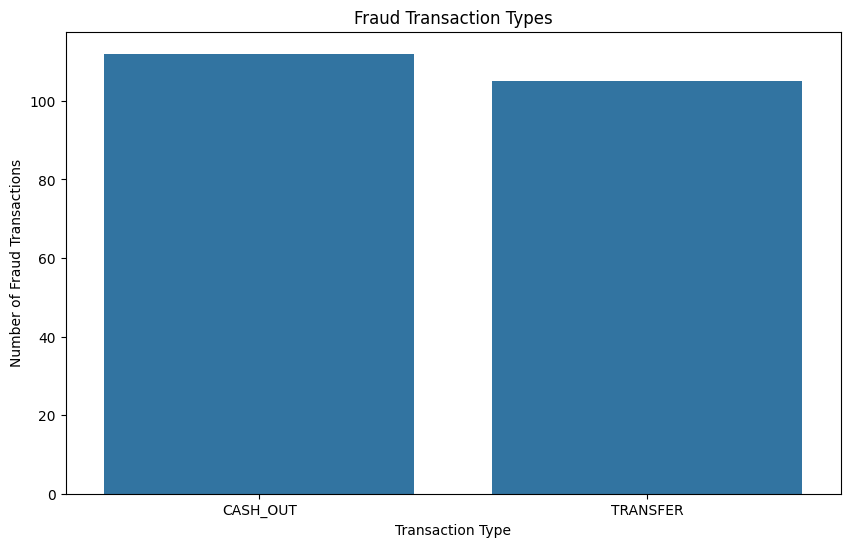

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_fraud_value_count.index, y=df_fraud_value_count.values)
plt.title('Fraud Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Fraud Transactions')
plt.show()

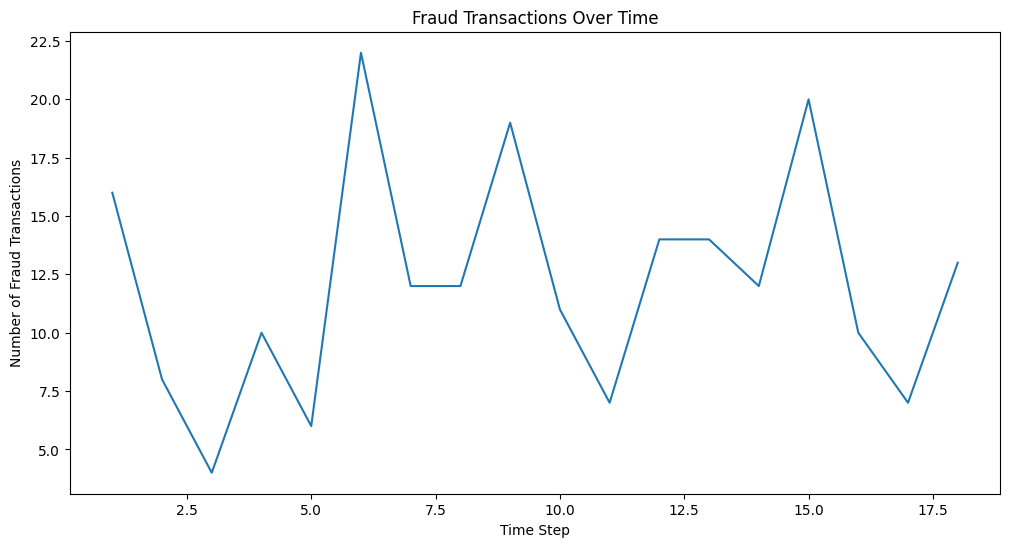

In [20]:
df_fraud_over_time = df.groupby('step')['isFraud'].sum()
# df_fraud_over_time.plot(figsize=(12,6))
# plt.title('Fraud Transactions Over Time')
# plt.xlabel('Time Step')
# plt.ylabel('Number of Fraud Transactions')
# plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(x=df_fraud_over_time.index, y=df_fraud_over_time.values)
plt.title('Fraud Transactions Over Time')
plt.xlabel('Time Step')
plt.ylabel('Number of Fraud Transactions')
plt.show()

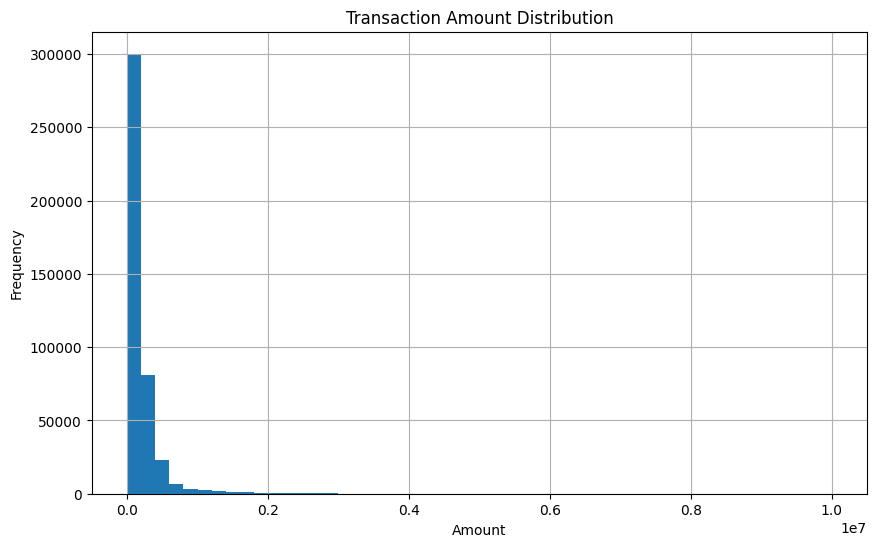

In [21]:
df['amount'].hist(bins=50, figsize=(10,6))
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

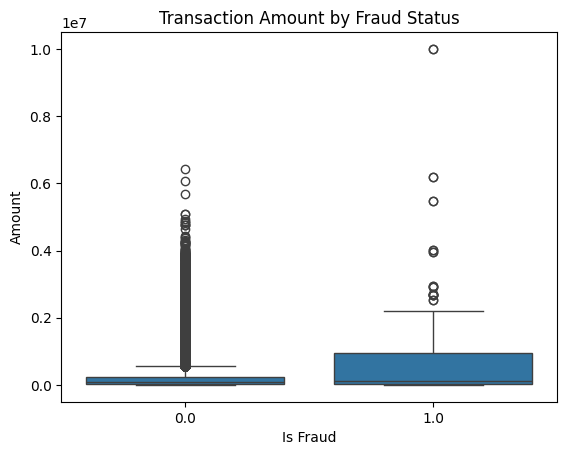

In [22]:
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.show()

/tmp/ipython-input-2307414797.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate=df.groupby('amount_bin')['isFraud'].mean()


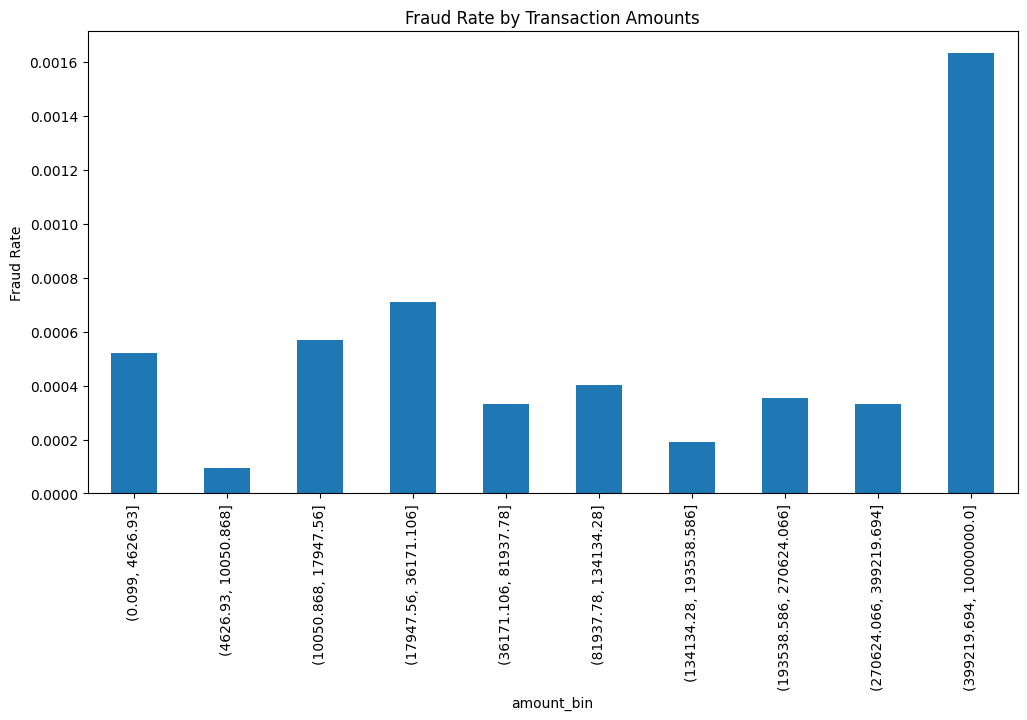

In [23]:
df['amount_bin']=pd.qcut(df['amount'],10)
fraud_rate=df.groupby('amount_bin')['isFraud'].mean()
fraud_rate.plot(kind='bar', figsize=(12,6))
plt.title('Fraud Rate by Transaction Amounts')
plt.ylabel('Fraud Rate')
plt.show()

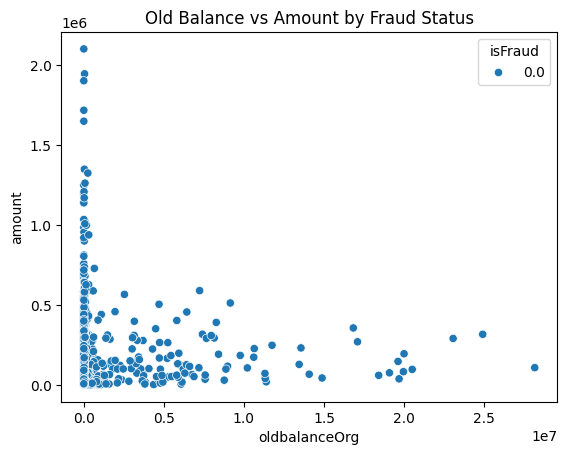

In [24]:
sns.scatterplot(x='oldbalanceOrg', y='amount', hue='isFraud', data=df.sample(1000))
plt.title('Old Balance vs Amount by Fraud Status')
plt.show()

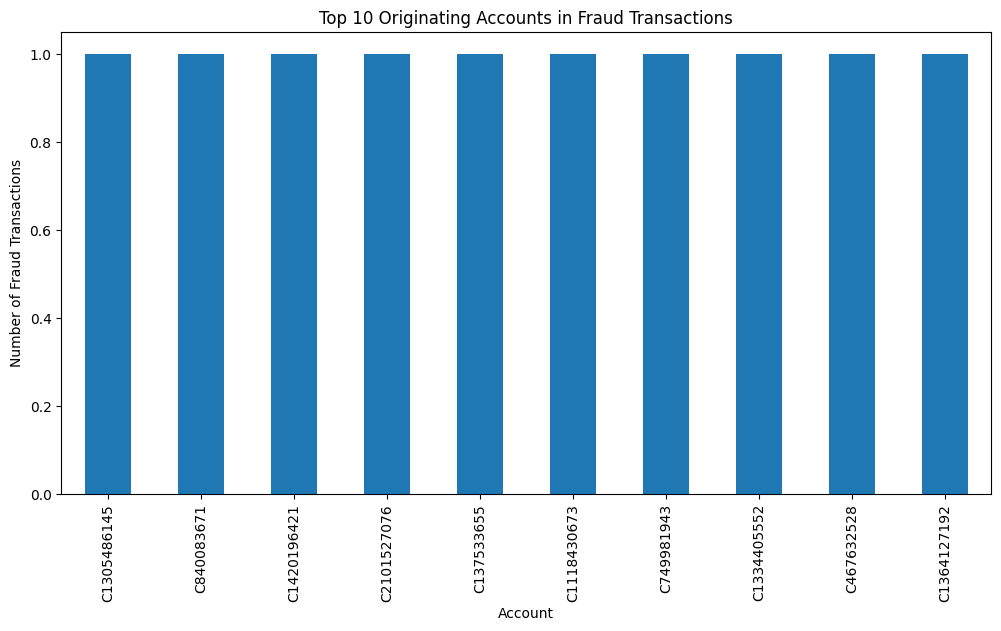

In [25]:
df_origin_in_fraud = df[df['isFraud']==1]['nameOrig'].value_counts().head(10)
df_origin_in_fraud.plot(kind='bar', figsize=(12,6))
plt.title('Top 10 Originating Accounts in Fraud Transactions')
plt.xlabel('Account')
plt.ylabel('Number of Fraud Transactions')
plt.show()

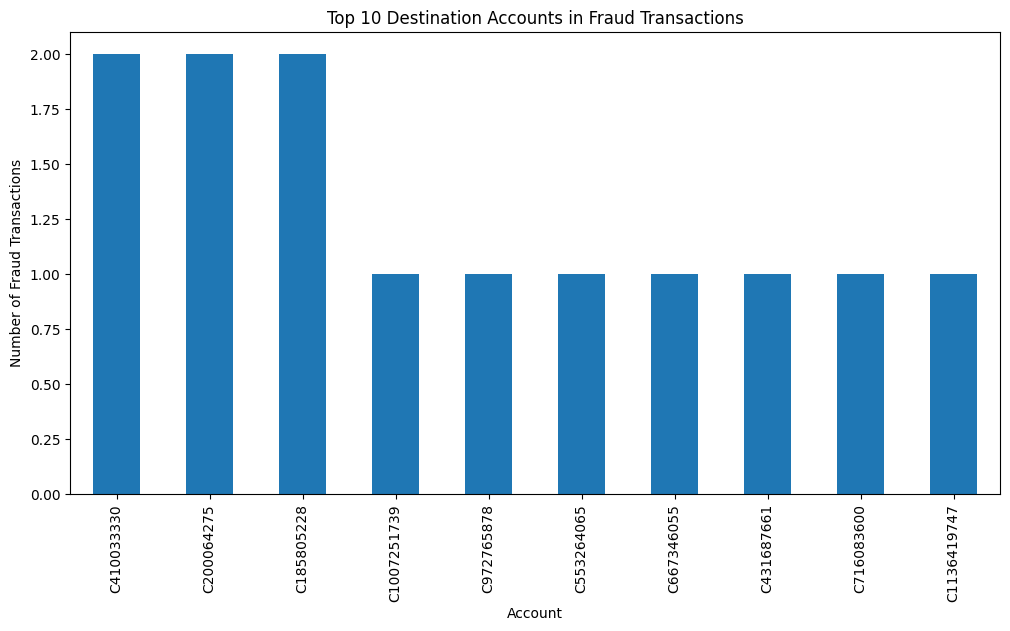

In [26]:
df_dest_in_fraud = df[df['isFraud']==1]['nameDest'].value_counts().head(10)
df_dest_in_fraud.plot(kind='bar', figsize=(12,6))
plt.title('Top 10 Destination Accounts in Fraud Transactions')
plt.xlabel('Account')
plt.ylabel('Number of Fraud Transactions')
plt.show()

In [27]:
df_origin_in_fraud

,count
nameOrig,
C1305486145,1
C840083671,1
C1420196421,1
C2101527076,1
C137533655,1
C1118430673,1
C749981943,1
C1334405552,1
C467632528,1


In [28]:
df_dest_in_fraud

,count
nameDest,
C410033330,2
C200064275,2
C185805228,2
C1007251739,1
C972765878,1
C553264065,1
C667346055,1
C431687661,1
C716083600,1


In [29]:
pd.crosstab(df['isFraud'], df['isFlaggedFraud'], normalize='index')

isFlaggedFraud,0.0
isFraud,
0.0,1.0
1.0,1.0


In [30]:
import networkx as nx
G = nx.from_pandas_edgelist(
    df,
    source='nameOrig',
    target='nameDest',
    edge_attr=['amount','type','isFraud','step'],
    create_using=nx.DiGraph()
)

In [ ]:
deg = nx.degree_centrality(G)
bet = nx.betweenness_centrality(G)
eig = nx.eigenvector_centrality(G)


In [ ]:
# convert to dataframe for analysis
pd.DataFrame({
    'node': list(deg.keys()),
    'degree': list(deg.values()),
    'betweenness': list(bet.values()),
    'eigenvector': list(eig.values()),
})
